In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from random import randint
from matplotlib import pyplot as plt
from scipy import ndimage

In [39]:
from tensorflow import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [40]:
# I took pictures as 32x32 in order to decrease time complexity(but if you take 64,64 transfer learning model gives %8 better accuracy)
def get_images():
    Images = []
    Image_Class = []
    for image_file in os.listdir("dataset"): #Extracting the file name of the image from Class Label folder
        for image_adress in os.listdir("dataset/{}".format(image_file)):
            image = cv2.imread('dataset/'+ image_file + '/'+image_adress) #Reading the image (OpenCV)
            image = cv2.resize(image,(32,32)) #Resizing the image, Some images are different sizes.
            Images.append(image)
            Image_Class.append(image_file)#Taking years from image name
        
    return shuffle(Images,Image_Class,random_state=25) #Shuffling the dataset.

In [41]:
Images,Class = get_images() #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Class = np.array(Class) #converting the list of images to numpy array.

In [42]:
len(Images)

5160

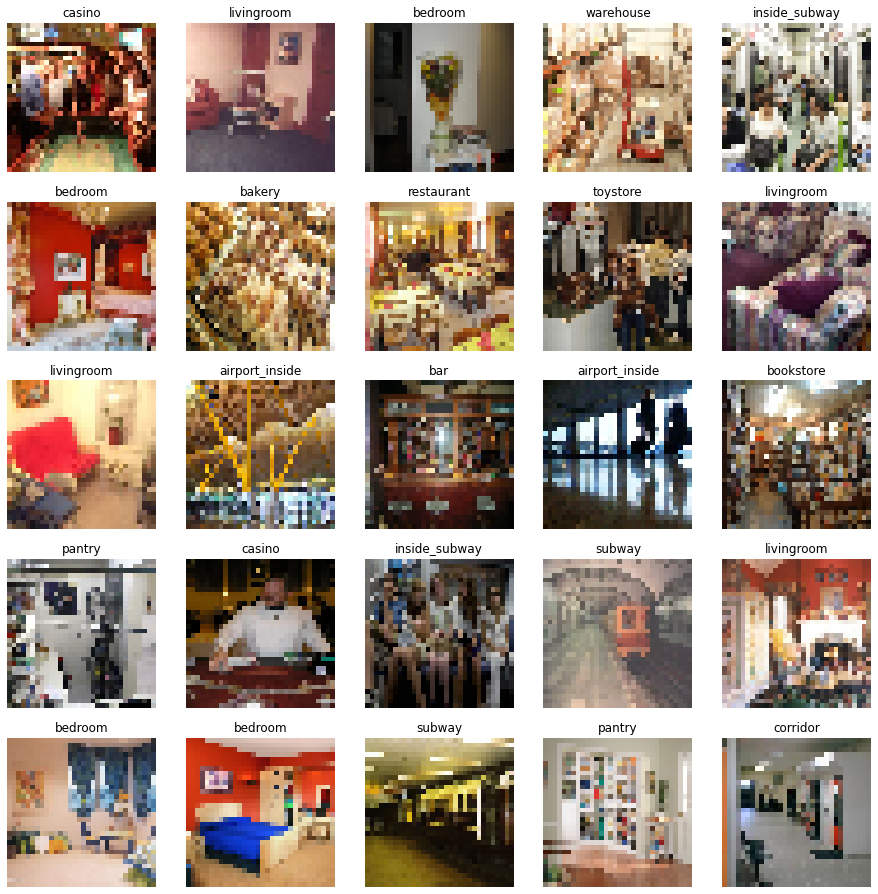

In [43]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(1,0,3,3)
for i in range(5):
    for j in range(5):
        rnd_number = randint(0,len(Images)-1)
        ax[i,j].imshow(cv2.cvtColor(Images[rnd_number], cv2.COLOR_BGR2RGB))
        ax[i,j].set_title(Class[rnd_number])#Shows classes
        ax[i,j].axis('off')

In [44]:
Images.shape

(5160, 32, 32, 3)

In [45]:
from sklearn import preprocessing

ohe = preprocessing.OneHotEncoder()
Class = ohe.fit_transform(Class.reshape(-1, 1)).toarray()

In [46]:
Class[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import mean

train_x, test_X, train_y, test_Y = train_test_split(Images, Class, test_size=0.15, random_state=0)#Splitting normal image data
train_X, valid_X, train_Y, valid_Y = train_test_split(train_x, train_y, test_size=0.20, random_state=0)#Splitting normal image data

In [48]:
#Normalization
train_X = train_X.astype('float32')
valid_X = valid_X.astype('float32')
test_X = test_X.astype('float32')

train_X = train_X / 255.
valid_X = valid_X / 255.
test_X = test_X / 255.

In [49]:
train_X.shape,valid_X.shape,test_X.shape,train_Y.shape,valid_Y.shape,test_Y.shape

((3508, 32, 32, 3),
 (878, 32, 32, 3),
 (774, 32, 32, 3),
 (3508, 15),
 (878, 15),
 (774, 15))

# CNN From Scratch

### Without Dropout

learning rate = 0.001 , batch size = 128

In [13]:
cnn_model1 = Sequential()
cnn_model1.add(Conv2D(16, kernel_size=6,activation=LeakyReLU(),input_shape=(32,32,3)))
cnn_model1.add(MaxPooling2D(3))
cnn_model1.add(Conv2D(32, 4, activation=LeakyReLU()))
cnn_model1.add(MaxPooling2D(2))
cnn_model1.add(Conv2D(32, 2, activation=LeakyReLU()))                
cnn_model1.add(MaxPooling2D(2))

cnn_model1.add(Flatten())
cnn_model1.add(Dense(16, activation=LeakyReLU()))

cnn_model1.add(Dense(15, activation="softmax"))

In [14]:
cnn_model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

cnn_train1 = cnn_model1.fit(train_X, train_Y, batch_size=128,epochs=100,verbose=1,validation_data=(valid_X, valid_Y))

Epoch 1/100
28/28 [==============================] - 1s 27ms/step - loss: 2.7021 - accuracy: 0.0676 - val_loss: 2.6778 - val_accuracy: 0.0786
Epoch 2/100
28/28 [==============================] - 1s 21ms/step - loss: 2.6504 - accuracy: 0.0983 - val_loss: 2.6159 - val_accuracy: 0.1196
Epoch 3/100
28/28 [==============================] - 1s 21ms/step - loss: 2.5720 - accuracy: 0.1306 - val_loss: 2.5076 - val_accuracy: 0.1697
Epoch 4/100
28/28 [==============================] - 1s 21ms/step - loss: 2.4818 - accuracy: 0.1611 - val_loss: 2.4637 - val_accuracy: 0.1970
Epoch 5/100
28/28 [==============================] - 1s 21ms/step - loss: 2.4269 - accuracy: 0.1793 - val_loss: 2.4227 - val_accuracy: 0.1765
Epoch 6/100
28/28 [==============================] - 1s 21ms/step - loss: 2.3883 - accuracy: 0.2038 - val_loss: 2.4359 - val_accuracy: 0.1731
Epoch 7/100
28/28 [==============================] - 1s 21ms/step - loss: 2.3941 - accuracy: 0.1887 - val_loss: 2.3880 - val_accuracy: 0.1936
Epoch 

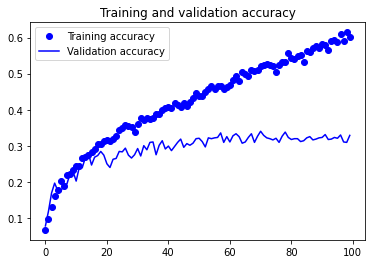

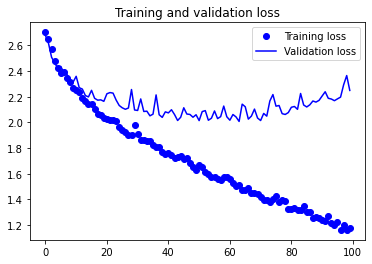

In [15]:
accuracy = cnn_train1.history['accuracy']
val_accuracy = cnn_train1.history['val_accuracy']
loss = cnn_train1.history['loss']
val_loss = cnn_train1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

learning rate = 0.001 , batch size = 32

In [16]:
cnn_model2 = Sequential()
cnn_model2.add(Conv2D(16, kernel_size=6,activation=LeakyReLU(),input_shape=(32,32,3)))
cnn_model2.add(MaxPooling2D(pool_size=3))
cnn_model2.add(Conv2D(32, 4, activation=LeakyReLU()))
cnn_model2.add(MaxPooling2D(2))
cnn_model2.add(Conv2D(32, 2, activation=LeakyReLU()))                
cnn_model2.add(MaxPooling2D(2))

cnn_model2.add(Flatten())
cnn_model2.add(Dense(16, activation=LeakyReLU()))

cnn_model2.add(Dense(15, activation="softmax"))

In [17]:
cnn_model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

cnn_train2 = cnn_model2.fit(train_X, train_Y, batch_size=32,epochs=100,verbose=1,validation_data=(valid_X, valid_Y))

Epoch 1/100
110/110 [==============================] - 1s 9ms/step - loss: 2.6596 - accuracy: 0.1018 - val_loss: 2.5348 - val_accuracy: 0.1412
Epoch 2/100
110/110 [==============================] - 1s 7ms/step - loss: 2.5055 - accuracy: 0.1539 - val_loss: 2.4583 - val_accuracy: 0.1925
Epoch 3/100
110/110 [==============================] - 1s 8ms/step - loss: 2.4252 - accuracy: 0.1819 - val_loss: 2.4091 - val_accuracy: 0.1925
Epoch 4/100
110/110 [==============================] - 1s 8ms/step - loss: 2.3536 - accuracy: 0.2067 - val_loss: 2.3505 - val_accuracy: 0.2164
Epoch 5/100
110/110 [==============================] - 1s 7ms/step - loss: 2.2972 - accuracy: 0.2363 - val_loss: 2.3028 - val_accuracy: 0.2312
Epoch 6/100
110/110 [==============================] - 1s 7ms/step - loss: 2.2263 - accuracy: 0.2489 - val_loss: 2.2452 - val_accuracy: 0.2677
Epoch 7/100
110/110 [==============================] - 1s 7ms/step - loss: 2.1649 - accuracy: 0.2782 - val_loss: 2.2093 - val_accuracy: 0.2597

Epoch 58/100
110/110 [==============================] - 1s 7ms/step - loss: 0.4543 - accuracy: 0.8552 - val_loss: 3.5388 - val_accuracy: 0.3098
Epoch 59/100
110/110 [==============================] - 1s 7ms/step - loss: 0.4720 - accuracy: 0.8458 - val_loss: 3.6989 - val_accuracy: 0.3132
Epoch 60/100
110/110 [==============================] - 1s 7ms/step - loss: 0.3913 - accuracy: 0.8808 - val_loss: 3.8944 - val_accuracy: 0.3075
Epoch 61/100
110/110 [==============================] - 1s 8ms/step - loss: 0.3962 - accuracy: 0.8731 - val_loss: 3.8843 - val_accuracy: 0.3109
Epoch 62/100
110/110 [==============================] - 1s 8ms/step - loss: 0.3507 - accuracy: 0.8957 - val_loss: 4.0150 - val_accuracy: 0.3132
Epoch 63/100
110/110 [==============================] - 1s 7ms/step - loss: 0.3518 - accuracy: 0.8894 - val_loss: 4.0896 - val_accuracy: 0.3121
Epoch 64/100
110/110 [==============================] - 1s 7ms/step - loss: 0.3352 - accuracy: 0.9028 - val_loss: 4.2794 - val_accuracy:

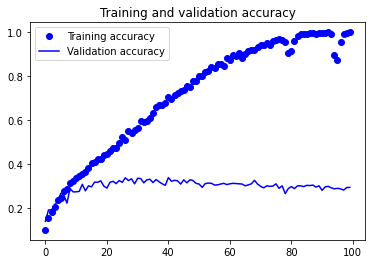

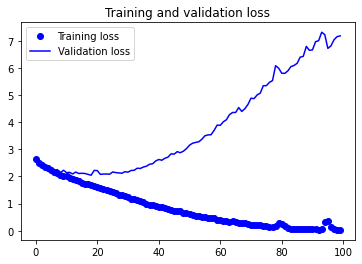

In [18]:
accuracy = cnn_train2.history['accuracy']
val_accuracy = cnn_train2.history['val_accuracy']
loss = cnn_train2.history['loss']
val_loss = cnn_train2.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

learning rate = 0.0005 , batch size = 128

In [19]:
cnn_model3 = Sequential()
cnn_model3.add(Conv2D(16, kernel_size=6,activation=LeakyReLU(),input_shape=(32,32,3)))
cnn_model3.add(MaxPooling2D(3))
cnn_model3.add(Conv2D(32, 4, activation=LeakyReLU()))
cnn_model3.add(MaxPooling2D(2))
cnn_model3.add(Conv2D(32, 2, activation=LeakyReLU()))                
cnn_model3.add(MaxPooling2D(2))

cnn_model3.add(Flatten())
cnn_model3.add(Dense(16, activation=LeakyReLU()))

cnn_model3.add(Dense(15, activation="softmax"))

In [20]:
cnn_model3.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.0005),metrics=['accuracy'])

cnn_train3 = cnn_model3.fit(train_X, train_Y, batch_size=128,epochs=100,verbose=1,validation_data=(valid_X, valid_Y))

Epoch 1/100
28/28 [==============================] - 1s 26ms/step - loss: 2.7052 - accuracy: 0.0753 - val_loss: 2.6966 - val_accuracy: 0.0900
Epoch 2/100
28/28 [==============================] - 1s 22ms/step - loss: 2.6767 - accuracy: 0.1135 - val_loss: 2.6608 - val_accuracy: 0.1219
Epoch 3/100
28/28 [==============================] - 1s 22ms/step - loss: 2.6222 - accuracy: 0.1189 - val_loss: 2.5967 - val_accuracy: 0.1173
Epoch 4/100
28/28 [==============================] - 1s 22ms/step - loss: 2.5512 - accuracy: 0.1209 - val_loss: 2.5402 - val_accuracy: 0.1355
Epoch 5/100
28/28 [==============================] - 1s 22ms/step - loss: 2.4916 - accuracy: 0.1554 - val_loss: 2.5232 - val_accuracy: 0.1526
Epoch 6/100
28/28 [==============================] - 1s 22ms/step - loss: 2.4672 - accuracy: 0.1594 - val_loss: 2.4855 - val_accuracy: 0.1390
Epoch 7/100
28/28 [==============================] - 1s 22ms/step - loss: 2.4320 - accuracy: 0.1690 - val_loss: 2.4701 - val_accuracy: 0.1446
Epoch 

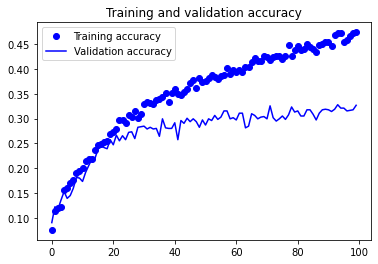

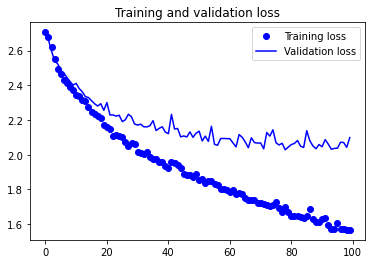

In [21]:
accuracy = cnn_train3.history['accuracy']
val_accuracy = cnn_train3.history['val_accuracy']
loss = cnn_train3.history['loss']
val_loss = cnn_train3.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

learning rate = 0.0005 , batch size = 32

In [22]:
cnn_model4 = Sequential()
cnn_model4.add(Conv2D(16, kernel_size=6,activation=LeakyReLU(),input_shape=(32,32,3)))
cnn_model4.add(MaxPooling2D(pool_size=3))
cnn_model4.add(Conv2D(32, 4, activation=LeakyReLU()))
cnn_model4.add(MaxPooling2D(2))
cnn_model4.add(Conv2D(32, 2, activation=LeakyReLU()))                
cnn_model4.add(MaxPooling2D(2))

cnn_model4.add(Flatten())
cnn_model4.add(Dense(16, activation=LeakyReLU()))

cnn_model4.add(Dense(15, activation="softmax"))

In [23]:
cnn_model4.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.0005),metrics=['accuracy'])

cnn_train4 = cnn_model4.fit(train_X, train_Y, batch_size=32,epochs=100,verbose=1,validation_data=(valid_X, valid_Y))

Epoch 1/100
110/110 [==============================] - 1s 9ms/step - loss: 2.6655 - accuracy: 0.0881 - val_loss: 2.5653 - val_accuracy: 0.1150
Epoch 2/100
110/110 [==============================] - 1s 8ms/step - loss: 2.5291 - accuracy: 0.1328 - val_loss: 2.4682 - val_accuracy: 0.1572
Epoch 3/100
110/110 [==============================] - 1s 8ms/step - loss: 2.4571 - accuracy: 0.1708 - val_loss: 2.4341 - val_accuracy: 0.1822
Epoch 4/100
110/110 [==============================] - 1s 8ms/step - loss: 2.4214 - accuracy: 0.1842 - val_loss: 2.3962 - val_accuracy: 0.1868
Epoch 5/100
110/110 [==============================] - 1s 8ms/step - loss: 2.3801 - accuracy: 0.1896 - val_loss: 2.4030 - val_accuracy: 0.1822
Epoch 6/100
110/110 [==============================] - 1s 9ms/step - loss: 2.3491 - accuracy: 0.2018 - val_loss: 2.3625 - val_accuracy: 0.1970
Epoch 7/100
110/110 [==============================] - 1s 8ms/step - loss: 2.3205 - accuracy: 0.2092 - val_loss: 2.3427 - val_accuracy: 0.2164

Epoch 58/100
110/110 [==============================] - 1s 8ms/step - loss: 1.5453 - accuracy: 0.4755 - val_loss: 2.0515 - val_accuracy: 0.3417
Epoch 59/100
110/110 [==============================] - 1s 8ms/step - loss: 1.5230 - accuracy: 0.4786 - val_loss: 2.0882 - val_accuracy: 0.3257
Epoch 60/100
110/110 [==============================] - 1s 8ms/step - loss: 1.5216 - accuracy: 0.4786 - val_loss: 2.0987 - val_accuracy: 0.3337
Epoch 61/100
110/110 [==============================] - 1s 8ms/step - loss: 1.5036 - accuracy: 0.4803 - val_loss: 2.0302 - val_accuracy: 0.3462
Epoch 62/100
110/110 [==============================] - 1s 8ms/step - loss: 1.4890 - accuracy: 0.4974 - val_loss: 2.0141 - val_accuracy: 0.3428
Epoch 63/100
110/110 [==============================] - 1s 8ms/step - loss: 1.4799 - accuracy: 0.4932 - val_loss: 2.0137 - val_accuracy: 0.3531
Epoch 64/100
110/110 [==============================] - 1s 8ms/step - loss: 1.4623 - accuracy: 0.4997 - val_loss: 2.0201 - val_accuracy:

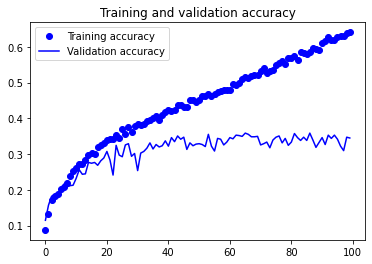

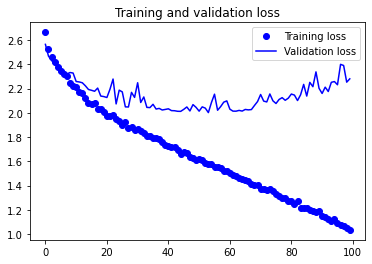

In [24]:
accuracy = cnn_train4.history['accuracy']
val_accuracy = cnn_train4.history['val_accuracy']
loss = cnn_train4.history['loss']
val_loss = cnn_train4.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

learning rate = 0.0001 , batch size = 128

In [25]:
cnn_model5 = Sequential()
cnn_model5.add(Conv2D(16, kernel_size=6,activation=LeakyReLU(),input_shape=(32,32,3)))
cnn_model5.add(MaxPooling2D(pool_size=3))
cnn_model5.add(Conv2D(32, 4, activation=LeakyReLU()))
cnn_model5.add(MaxPooling2D(2))
cnn_model5.add(Conv2D(32, 2, activation=LeakyReLU()))                
cnn_model5.add(MaxPooling2D(2))

cnn_model5.add(Flatten())
cnn_model5.add(Dense(16, activation=LeakyReLU()))

cnn_model5.add(Dense(15, activation="softmax"))

In [26]:
cnn_model5.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

cnn_train5 = cnn_model5.fit(train_X, train_Y, batch_size=128,epochs=100,verbose=1,validation_data=(valid_X, valid_Y))

Epoch 1/100
28/28 [==============================] - 1s 27ms/step - loss: 2.7078 - accuracy: 0.0784 - val_loss: 2.7058 - val_accuracy: 0.0706
Epoch 2/100
28/28 [==============================] - 1s 22ms/step - loss: 2.7020 - accuracy: 0.0864 - val_loss: 2.7013 - val_accuracy: 0.0797
Epoch 3/100
28/28 [==============================] - 1s 22ms/step - loss: 2.6972 - accuracy: 0.1066 - val_loss: 2.6965 - val_accuracy: 0.0831
Epoch 4/100
28/28 [==============================] - 1s 22ms/step - loss: 2.6914 - accuracy: 0.1060 - val_loss: 2.6902 - val_accuracy: 0.0843
Epoch 5/100
28/28 [==============================] - 1s 23ms/step - loss: 2.6836 - accuracy: 0.1100 - val_loss: 2.6813 - val_accuracy: 0.0968
Epoch 6/100
28/28 [==============================] - 1s 23ms/step - loss: 2.6730 - accuracy: 0.1035 - val_loss: 2.6698 - val_accuracy: 0.0968
Epoch 7/100
28/28 [==============================] - 1s 22ms/step - loss: 2.6602 - accuracy: 0.1023 - val_loss: 2.6559 - val_accuracy: 0.1025
Epoch 

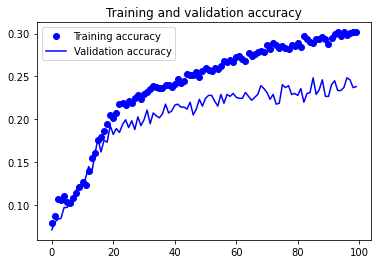

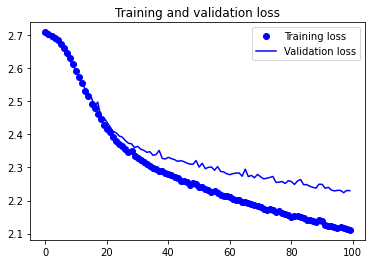

In [27]:
accuracy = cnn_train5.history['accuracy']
val_accuracy = cnn_train5.history['val_accuracy']
loss = cnn_train5.history['loss']
val_loss = cnn_train5.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

learning rate = 0.0001 , batch size = 32

In [28]:
cnn_model6 = Sequential()
cnn_model6.add(Conv2D(16, kernel_size=6,activation=LeakyReLU(),input_shape=(32,32,3)))
cnn_model6.add(MaxPooling2D(pool_size=3))
cnn_model6.add(Conv2D(32, 4, activation=LeakyReLU()))
cnn_model6.add(MaxPooling2D(2))
cnn_model6.add(Conv2D(32, 2, activation=LeakyReLU()))                
cnn_model6.add(MaxPooling2D(2))

cnn_model6.add(Flatten())
cnn_model6.add(Dense(16, activation=LeakyReLU()))

cnn_model6.add(Dense(15, activation="softmax"))

In [29]:
cnn_model6.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

cnn_train6 = cnn_model6.fit(train_X, train_Y, batch_size=32,epochs=100,verbose=1,validation_data=(valid_X, valid_Y))

Epoch 1/100
110/110 [==============================] - 1s 9ms/step - loss: 2.7048 - accuracy: 0.0681 - val_loss: 2.6982 - val_accuracy: 0.0945
Epoch 2/100
110/110 [==============================] - 1s 8ms/step - loss: 2.6898 - accuracy: 0.0972 - val_loss: 2.6788 - val_accuracy: 0.1048
Epoch 3/100
110/110 [==============================] - 1s 8ms/step - loss: 2.6546 - accuracy: 0.1251 - val_loss: 2.6385 - val_accuracy: 0.1310
Epoch 4/100
110/110 [==============================] - 1s 8ms/step - loss: 2.6045 - accuracy: 0.1422 - val_loss: 2.5882 - val_accuracy: 0.1264
Epoch 5/100
110/110 [==============================] - 1s 8ms/step - loss: 2.5561 - accuracy: 0.1514 - val_loss: 2.5571 - val_accuracy: 0.1355
Epoch 6/100
110/110 [==============================] - 1s 8ms/step - loss: 2.5144 - accuracy: 0.1571 - val_loss: 2.5213 - val_accuracy: 0.1412
Epoch 7/100
110/110 [==============================] - 1s 8ms/step - loss: 2.4812 - accuracy: 0.1579 - val_loss: 2.4950 - val_accuracy: 0.1435

Epoch 58/100
110/110 [==============================] - 1s 8ms/step - loss: 2.1080 - accuracy: 0.2891 - val_loss: 2.2379 - val_accuracy: 0.2369
Epoch 59/100
110/110 [==============================] - 1s 8ms/step - loss: 2.1049 - accuracy: 0.2930 - val_loss: 2.2287 - val_accuracy: 0.2312
Epoch 60/100
110/110 [==============================] - 1s 8ms/step - loss: 2.1028 - accuracy: 0.2922 - val_loss: 2.2221 - val_accuracy: 0.2312
Epoch 61/100
110/110 [==============================] - 1s 8ms/step - loss: 2.0958 - accuracy: 0.2976 - val_loss: 2.2090 - val_accuracy: 0.2392
Epoch 62/100
110/110 [==============================] - 1s 8ms/step - loss: 2.0958 - accuracy: 0.2939 - val_loss: 2.2083 - val_accuracy: 0.2380
Epoch 63/100
110/110 [==============================] - 1s 8ms/step - loss: 2.0881 - accuracy: 0.2910 - val_loss: 2.2165 - val_accuracy: 0.2494
Epoch 64/100
110/110 [==============================] - 1s 8ms/step - loss: 2.0827 - accuracy: 0.3016 - val_loss: 2.2080 - val_accuracy:

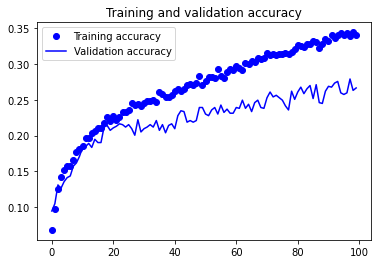

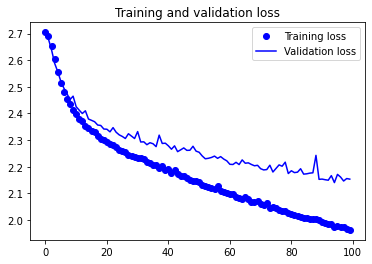

In [30]:
accuracy = cnn_train6.history['accuracy']
val_accuracy = cnn_train6.history['val_accuracy']
loss = cnn_train6.history['loss']
val_loss = cnn_train6.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### With Dropout

With dropout = 0.1

In [31]:
cnn_dropout_model1 = Sequential()
cnn_dropout_model1.add(Conv2D(16, kernel_size=6,activation=LeakyReLU(),input_shape=(32,32,3)))
cnn_dropout_model1.add(MaxPooling2D(pool_size=3))
cnn_dropout_model1.add(Conv2D(32, 4, activation=LeakyReLU()))
cnn_dropout_model1.add(MaxPooling2D(2))
cnn_dropout_model1.add(Conv2D(32, 2, activation=LeakyReLU()))                
cnn_dropout_model1.add(MaxPooling2D(2))

cnn_dropout_model1.add(Flatten())
cnn_dropout_model1.add(Dense(16, activation=LeakyReLU()))
cnn_dropout_model1.add(Dropout(0.1))
cnn_dropout_model1.add(Dense(15, activation="softmax"))

In [32]:
cnn_dropout_model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.0005),metrics=['accuracy'])

cnn_dropout_train1 = cnn_dropout_model1.fit(train_X, train_Y, batch_size=32,epochs=100,verbose=1,validation_data=(valid_X, valid_Y))

Epoch 1/100
110/110 [==============================] - 1s 9ms/step - loss: 2.7038 - accuracy: 0.0724 - val_loss: 2.6885 - val_accuracy: 0.0718
Epoch 2/100
110/110 [==============================] - 1s 7ms/step - loss: 2.6637 - accuracy: 0.1075 - val_loss: 2.6096 - val_accuracy: 0.1150
Epoch 3/100
110/110 [==============================] - 1s 8ms/step - loss: 2.5617 - accuracy: 0.1377 - val_loss: 2.4905 - val_accuracy: 0.1469
Epoch 4/100
110/110 [==============================] - 1s 8ms/step - loss: 2.4716 - accuracy: 0.1599 - val_loss: 2.4265 - val_accuracy: 0.1697
Epoch 5/100
110/110 [==============================] - 1s 8ms/step - loss: 2.4209 - accuracy: 0.1765 - val_loss: 2.3808 - val_accuracy: 0.1925
Epoch 6/100
110/110 [==============================] - 1s 7ms/step - loss: 2.3978 - accuracy: 0.1984 - val_loss: 2.3685 - val_accuracy: 0.2141
Epoch 7/100
110/110 [==============================] - 1s 8ms/step - loss: 2.3473 - accuracy: 0.2090 - val_loss: 2.3021 - val_accuracy: 0.2415

Epoch 58/100
110/110 [==============================] - 1s 7ms/step - loss: 1.4925 - accuracy: 0.4852 - val_loss: 1.9913 - val_accuracy: 0.3360
Epoch 59/100
110/110 [==============================] - 1s 7ms/step - loss: 1.4778 - accuracy: 0.4863 - val_loss: 2.1871 - val_accuracy: 0.3200
Epoch 60/100
110/110 [==============================] - 1s 7ms/step - loss: 1.5001 - accuracy: 0.4875 - val_loss: 2.0505 - val_accuracy: 0.3155
Epoch 61/100
110/110 [==============================] - 1s 7ms/step - loss: 1.4584 - accuracy: 0.4957 - val_loss: 2.0596 - val_accuracy: 0.3303
Epoch 62/100
110/110 [==============================] - 1s 7ms/step - loss: 1.4408 - accuracy: 0.4989 - val_loss: 2.0272 - val_accuracy: 0.3257
Epoch 63/100
110/110 [==============================] - 1s 7ms/step - loss: 1.4368 - accuracy: 0.4991 - val_loss: 2.0581 - val_accuracy: 0.3132
Epoch 64/100
110/110 [==============================] - 1s 7ms/step - loss: 1.4129 - accuracy: 0.5091 - val_loss: 2.0588 - val_accuracy:

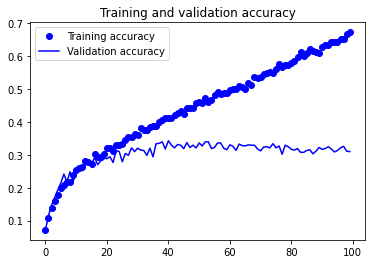

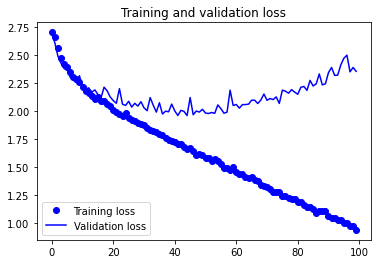

In [33]:
accuracy = cnn_dropout_train1.history['accuracy']
val_accuracy = cnn_dropout_train1.history['val_accuracy']
loss = cnn_dropout_train1.history['loss']
val_loss = cnn_dropout_train1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

With dropout = 0.2

In [34]:
cnn_dropout_model2 = Sequential()
cnn_dropout_model2.add(Conv2D(16, kernel_size=6,activation=LeakyReLU(),input_shape=(32,32,3)))
cnn_dropout_model2.add(MaxPooling2D(pool_size=3))
cnn_dropout_model2.add(Conv2D(32, 4, activation=LeakyReLU()))
cnn_dropout_model2.add(MaxPooling2D(2))
cnn_dropout_model2.add(Conv2D(32, 2, activation=LeakyReLU()))                
cnn_dropout_model2.add(MaxPooling2D(2))

cnn_dropout_model2.add(Flatten())
cnn_dropout_model2.add(Dense(16, activation=LeakyReLU()))
cnn_dropout_model2.add(Dropout(0.2))
cnn_dropout_model2.add(Dense(15, activation="softmax"))

In [35]:
cnn_dropout_model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.0005),metrics=['accuracy'])

cnn_dropout_train2 = cnn_dropout_model2.fit(train_X, train_Y, batch_size=32,epochs=100,verbose=1,validation_data=(valid_X, valid_Y))

Epoch 1/100
110/110 [==============================] - 1s 9ms/step - loss: 2.6930 - accuracy: 0.0869 - val_loss: 2.6471 - val_accuracy: 0.1253
Epoch 2/100
110/110 [==============================] - 1s 7ms/step - loss: 2.5809 - accuracy: 0.1240 - val_loss: 2.5403 - val_accuracy: 0.1515
Epoch 3/100
110/110 [==============================] - 1s 7ms/step - loss: 2.5167 - accuracy: 0.1357 - val_loss: 2.4578 - val_accuracy: 0.1538
Epoch 4/100
110/110 [==============================] - 1s 7ms/step - loss: 2.4581 - accuracy: 0.1616 - val_loss: 2.4395 - val_accuracy: 0.1822
Epoch 5/100
110/110 [==============================] - 1s 8ms/step - loss: 2.4086 - accuracy: 0.1893 - val_loss: 2.3932 - val_accuracy: 0.1925
Epoch 6/100
110/110 [==============================] - 1s 8ms/step - loss: 2.3884 - accuracy: 0.2087 - val_loss: 2.5380 - val_accuracy: 0.1515
Epoch 7/100
110/110 [==============================] - 1s 8ms/step - loss: 2.3431 - accuracy: 0.2055 - val_loss: 2.3296 - val_accuracy: 0.2255

Epoch 58/100
110/110 [==============================] - 1s 8ms/step - loss: 1.5204 - accuracy: 0.4775 - val_loss: 2.0566 - val_accuracy: 0.3200
Epoch 59/100
110/110 [==============================] - 1s 8ms/step - loss: 1.5196 - accuracy: 0.4641 - val_loss: 2.0174 - val_accuracy: 0.3440
Epoch 60/100
110/110 [==============================] - 1s 8ms/step - loss: 1.5173 - accuracy: 0.4738 - val_loss: 2.0420 - val_accuracy: 0.3371
Epoch 61/100
110/110 [==============================] - 1s 8ms/step - loss: 1.5062 - accuracy: 0.4718 - val_loss: 2.0218 - val_accuracy: 0.3200
Epoch 62/100
110/110 [==============================] - 1s 8ms/step - loss: 1.5085 - accuracy: 0.4769 - val_loss: 2.0487 - val_accuracy: 0.3337
Epoch 63/100
110/110 [==============================] - 1s 8ms/step - loss: 1.4885 - accuracy: 0.4809 - val_loss: 2.0220 - val_accuracy: 0.3280
Epoch 64/100
110/110 [==============================] - 1s 8ms/step - loss: 1.4806 - accuracy: 0.4866 - val_loss: 2.0879 - val_accuracy:

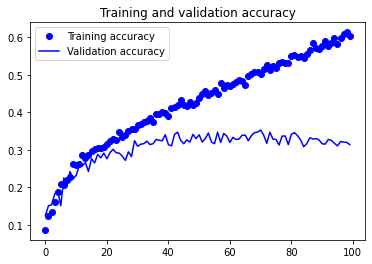

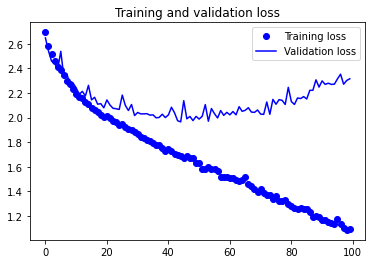

In [36]:
accuracy = cnn_dropout_train2.history['accuracy']
val_accuracy = cnn_dropout_train2.history['val_accuracy']
loss = cnn_dropout_train2.history['loss']
val_loss = cnn_dropout_train2.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

With dropout = 0.4

In [37]:
cnn_dropout_model3 = Sequential()
cnn_dropout_model3.add(Conv2D(16, kernel_size=6,activation=LeakyReLU(),input_shape=(32,32,3)))
cnn_dropout_model3.add(MaxPooling2D(pool_size=3))
cnn_dropout_model3.add(Conv2D(32, 4, activation=LeakyReLU()))
cnn_dropout_model3.add(MaxPooling2D(2))
cnn_dropout_model3.add(Conv2D(32, 2, activation=LeakyReLU()))                
cnn_dropout_model3.add(MaxPooling2D(2))

cnn_dropout_model3.add(Flatten())
cnn_dropout_model3.add(Dense(16, activation=LeakyReLU()))
cnn_dropout_model3.add(Dropout(0.4))
cnn_dropout_model3.add(Dense(15, activation="softmax"))

In [38]:
cnn_dropout_model3.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.0005),metrics=['accuracy'])

cnn_dropout_train3 = cnn_dropout_model3.fit(train_X, train_Y, batch_size=32,epochs=100,verbose=1,validation_data=(valid_X, valid_Y))

Epoch 1/100
110/110 [==============================] - 1s 9ms/step - loss: 2.6816 - accuracy: 0.0944 - val_loss: 2.6217 - val_accuracy: 0.1481
Epoch 2/100
110/110 [==============================] - 1s 8ms/step - loss: 2.5968 - accuracy: 0.1283 - val_loss: 2.5343 - val_accuracy: 0.1572
Epoch 3/100
110/110 [==============================] - 1s 8ms/step - loss: 2.5417 - accuracy: 0.1385 - val_loss: 2.4860 - val_accuracy: 0.1560
Epoch 4/100
110/110 [==============================] - 1s 8ms/step - loss: 2.5164 - accuracy: 0.1442 - val_loss: 2.4664 - val_accuracy: 0.1674
Epoch 5/100
110/110 [==============================] - 1s 8ms/step - loss: 2.4899 - accuracy: 0.1639 - val_loss: 2.4243 - val_accuracy: 0.1754
Epoch 6/100
110/110 [==============================] - 1s 8ms/step - loss: 2.4529 - accuracy: 0.1668 - val_loss: 2.4005 - val_accuracy: 0.1936
Epoch 7/100
110/110 [==============================] - 1s 8ms/step - loss: 2.4282 - accuracy: 0.1776 - val_loss: 2.4093 - val_accuracy: 0.1925

Epoch 58/100
110/110 [==============================] - 1s 8ms/step - loss: 1.7044 - accuracy: 0.4054 - val_loss: 2.0463 - val_accuracy: 0.3303
Epoch 59/100
110/110 [==============================] - 1s 8ms/step - loss: 1.7575 - accuracy: 0.3905 - val_loss: 2.0924 - val_accuracy: 0.3144
Epoch 60/100
110/110 [==============================] - 1s 8ms/step - loss: 1.6687 - accuracy: 0.4131 - val_loss: 2.0153 - val_accuracy: 0.3326
Epoch 61/100
110/110 [==============================] - 1s 8ms/step - loss: 1.6848 - accuracy: 0.4151 - val_loss: 1.9871 - val_accuracy: 0.3349
Epoch 62/100
110/110 [==============================] - 1s 8ms/step - loss: 1.6599 - accuracy: 0.4036 - val_loss: 2.0397 - val_accuracy: 0.3394
Epoch 63/100
110/110 [==============================] - 1s 8ms/step - loss: 1.6620 - accuracy: 0.4196 - val_loss: 2.0292 - val_accuracy: 0.3269
Epoch 64/100
110/110 [==============================] - 1s 8ms/step - loss: 1.6452 - accuracy: 0.4302 - val_loss: 2.0122 - val_accuracy:

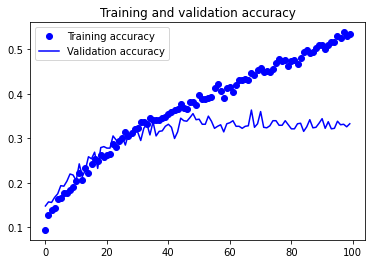

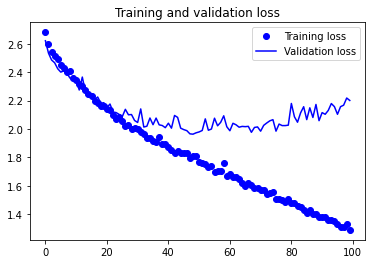

In [39]:
accuracy = cnn_dropout_train3.history['accuracy']
val_accuracy = cnn_dropout_train3.history['val_accuracy']
loss = cnn_dropout_train3.history['loss']
val_loss = cnn_dropout_train3.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

With dropout = 0.8

In [40]:
cnn_dropout_model4 = Sequential()
cnn_dropout_model4.add(Conv2D(16, kernel_size=6,activation=LeakyReLU(),input_shape=(32,32,3)))
cnn_dropout_model4.add(MaxPooling2D(pool_size=3))
cnn_dropout_model4.add(Conv2D(32, 4, activation=LeakyReLU()))
cnn_dropout_model4.add(MaxPooling2D(2))
cnn_dropout_model4.add(Conv2D(32, 2, activation=LeakyReLU()))                
cnn_dropout_model4.add(MaxPooling2D(2))

cnn_dropout_model4.add(Flatten())
cnn_dropout_model4.add(Dense(16, activation=LeakyReLU()))
cnn_dropout_model4.add(Dropout(0.8))
cnn_dropout_model4.add(Dense(15, activation="softmax"))

In [41]:
cnn_dropout_model4.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.0005),metrics=['accuracy'])

cnn_dropout_train4 = cnn_dropout_model4.fit(train_X, train_Y, batch_size=32,epochs=100,verbose=1,validation_data=(valid_X, valid_Y))

Epoch 1/100
110/110 [==============================] - 1s 9ms/step - loss: 2.7134 - accuracy: 0.0658 - val_loss: 2.7043 - val_accuracy: 0.0979
Epoch 2/100
110/110 [==============================] - 1s 9ms/step - loss: 2.7048 - accuracy: 0.0784 - val_loss: 2.6960 - val_accuracy: 0.1093
Epoch 3/100
110/110 [==============================] - 1s 8ms/step - loss: 2.6920 - accuracy: 0.0952 - val_loss: 2.6733 - val_accuracy: 0.1310
Epoch 4/100
110/110 [==============================] - 1s 9ms/step - loss: 2.6711 - accuracy: 0.1058 - val_loss: 2.6444 - val_accuracy: 0.1355
Epoch 5/100
110/110 [==============================] - 1s 8ms/step - loss: 2.6585 - accuracy: 0.1080 - val_loss: 2.6197 - val_accuracy: 0.1583
Epoch 6/100
110/110 [==============================] - 1s 9ms/step - loss: 2.6311 - accuracy: 0.1177 - val_loss: 2.5900 - val_accuracy: 0.1526
Epoch 7/100
110/110 [==============================] - 1s 9ms/step - loss: 2.6126 - accuracy: 0.1180 - val_loss: 2.5573 - val_accuracy: 0.1777

Epoch 58/100
110/110 [==============================] - 1s 8ms/step - loss: 2.1325 - accuracy: 0.2338 - val_loss: 2.1604 - val_accuracy: 0.2711
Epoch 59/100
110/110 [==============================] - 1s 8ms/step - loss: 2.1368 - accuracy: 0.2320 - val_loss: 2.1439 - val_accuracy: 0.2825
Epoch 60/100
110/110 [==============================] - 1s 8ms/step - loss: 2.1038 - accuracy: 0.2471 - val_loss: 2.1565 - val_accuracy: 0.2802
Epoch 61/100
110/110 [==============================] - 1s 8ms/step - loss: 2.1513 - accuracy: 0.2212 - val_loss: 2.2090 - val_accuracy: 0.2768
Epoch 62/100
110/110 [==============================] - 1s 8ms/step - loss: 2.1189 - accuracy: 0.2397 - val_loss: 2.1624 - val_accuracy: 0.2733
Epoch 63/100
110/110 [==============================] - 1s 8ms/step - loss: 2.0922 - accuracy: 0.2412 - val_loss: 2.1647 - val_accuracy: 0.2620
Epoch 64/100
110/110 [==============================] - 1s 8ms/step - loss: 2.0929 - accuracy: 0.2352 - val_loss: 2.2006 - val_accuracy:

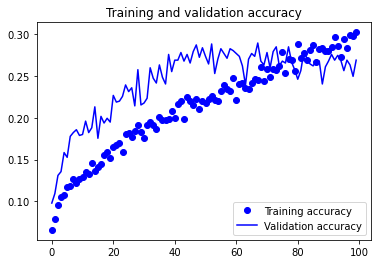

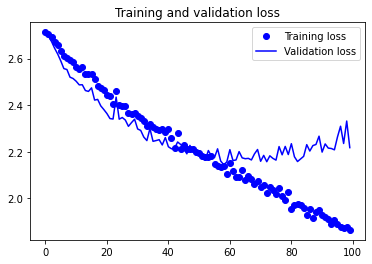

In [42]:
accuracy = cnn_dropout_train4.history['accuracy']
val_accuracy = cnn_dropout_train4.history['val_accuracy']
loss = cnn_dropout_train4.history['loss']
val_loss = cnn_dropout_train4.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Transfer Learning

In [13]:
from tensorflow.keras.applications.vgg16 import VGG16

Train only FC layers

In [26]:
## Loading VGG16 model
base_model1 = VGG16(weights="imagenet", include_top=False, input_shape=train_X[0].shape)
base_model1.trainable = False ## Not trainable weights

In [27]:
for i, layer in enumerate(base_model1.layers):
    print(i, layer.name, layer.trainable)

0 input_5 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [28]:
tr_model1 = Sequential()
tr_model1.add(base_model1)

tr_model1.add(Flatten())
tr_model1.add(Dense(32, activation=LeakyReLU()))
tr_model1.add(Dropout(0.4))
tr_model1.add(Dense(15, activation="softmax"))

In [29]:
tr_model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

tr_train1 = tr_model1.fit(train_X, train_Y, batch_size=32,epochs=100,verbose=1,validation_data=(valid_X, valid_Y))

Epoch 1/100
110/110 [==============================] - 10s 85ms/step - loss: 2.5653 - accuracy: 0.1596 - val_loss: 2.3147 - val_accuracy: 0.2608
Epoch 2/100
110/110 [==============================] - 10s 87ms/step - loss: 2.2566 - accuracy: 0.2580 - val_loss: 2.1144 - val_accuracy: 0.3200
Epoch 3/100
110/110 [==============================] - 11s 97ms/step - loss: 2.1261 - accuracy: 0.3005 - val_loss: 2.0398 - val_accuracy: 0.3257
Epoch 4/100
110/110 [==============================] - 11s 99ms/step - loss: 2.0338 - accuracy: 0.3241 - val_loss: 1.9779 - val_accuracy: 0.3292
Epoch 5/100
110/110 [==============================] - 11s 103ms/step - loss: 1.9700 - accuracy: 0.3438 - val_loss: 1.9277 - val_accuracy: 0.3474
Epoch 6/100
110/110 [==============================] - 11s 97ms/step - loss: 1.9369 - accuracy: 0.3563 - val_loss: 1.8919 - val_accuracy: 0.3531
Epoch 7/100
110/110 [==============================] - 11s 98ms/step - loss: 1.8985 - accuracy: 0.3660 - val_loss: 1.8655 - val_a

Epoch 57/100
110/110 [==============================] - 12s 110ms/step - loss: 1.3340 - accuracy: 0.5462 - val_loss: 1.8005 - val_accuracy: 0.4260
Epoch 58/100
110/110 [==============================] - 12s 110ms/step - loss: 1.3206 - accuracy: 0.5430 - val_loss: 1.8057 - val_accuracy: 0.4180
Epoch 59/100
110/110 [==============================] - 12s 110ms/step - loss: 1.3237 - accuracy: 0.5439 - val_loss: 1.7956 - val_accuracy: 0.4226
Epoch 60/100
110/110 [==============================] - 12s 109ms/step - loss: 1.3307 - accuracy: 0.5505 - val_loss: 1.7969 - val_accuracy: 0.4077
Epoch 61/100
110/110 [==============================] - 12s 110ms/step - loss: 1.3276 - accuracy: 0.5539 - val_loss: 1.7965 - val_accuracy: 0.4282
Epoch 62/100
110/110 [==============================] - 12s 109ms/step - loss: 1.3046 - accuracy: 0.5667 - val_loss: 1.8086 - val_accuracy: 0.4169
Epoch 63/100
110/110 [==============================] - 12s 110ms/step - loss: 1.2892 - accuracy: 0.5596 - val_loss: 1

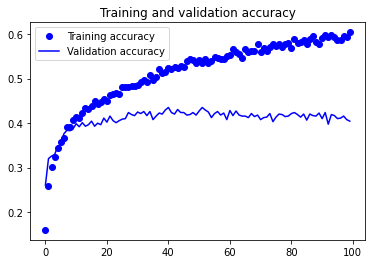

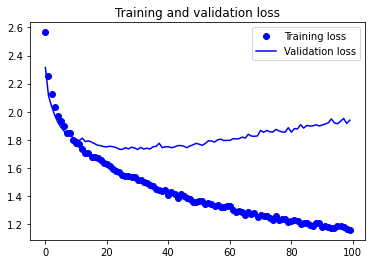

In [35]:
accuracy = tr_train1.history['accuracy']
val_accuracy = tr_train1.history['val_accuracy']
loss = tr_train1.history['loss']
val_loss = tr_train1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Train last 2 conv  layer and FC layers

In [38]:
## Loading VGG16 model
base_model2 = VGG16(weights="imagenet", include_top=False, input_shape=train_X[0].shape)
base_model2.trainable = False ## Not trainable weights

In [39]:
base_model2.layers[16].trainable = True
base_model2.layers[17].trainable = True

In [40]:
for i, layer in enumerate(base_model2.layers):
    print(i, layer.name, layer.trainable)

0 input_7 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool False


In [41]:
trans_learn_model2 = Sequential()
trans_learn_model2.add(base_model2)

trans_learn_model2.add(Flatten())
trans_learn_model2.add(Dense(32, activation=LeakyReLU()))

trans_learn_model2.add(Dense(15, activation="softmax"))

In [42]:
trans_learn_model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=5e-4),metrics=['accuracy'])

trans_learn_train2 = trans_learn_model2.fit(train_X, train_Y, batch_size=32,epochs=100,verbose=1,validation_data=(valid_X, valid_Y))

Epoch 1/100
110/110 [==============================] - 10s 88ms/step - loss: 2.6057 - accuracy: 0.1591 - val_loss: 2.4612 - val_accuracy: 0.2346
Epoch 2/100
110/110 [==============================] - 10s 92ms/step - loss: 2.3066 - accuracy: 0.2785 - val_loss: 2.2260 - val_accuracy: 0.3075
Epoch 3/100
110/110 [==============================] - 10s 93ms/step - loss: 2.1124 - accuracy: 0.3344 - val_loss: 2.0945 - val_accuracy: 0.3155
Epoch 4/100
110/110 [==============================] - 10s 93ms/step - loss: 1.9944 - accuracy: 0.3529 - val_loss: 2.0155 - val_accuracy: 0.3349
Epoch 5/100
110/110 [==============================] - 10s 95ms/step - loss: 1.9111 - accuracy: 0.3877 - val_loss: 1.9615 - val_accuracy: 0.3428
Epoch 6/100
110/110 [==============================] - 11s 96ms/step - loss: 1.8536 - accuracy: 0.3991 - val_loss: 1.9188 - val_accuracy: 0.3519
Epoch 7/100
110/110 [==============================] - 11s 97ms/step - loss: 1.8070 - accuracy: 0.4131 - val_loss: 1.8926 - val_ac

Epoch 57/100
110/110 [==============================] - 12s 107ms/step - loss: 1.1814 - accuracy: 0.6212 - val_loss: 1.8169 - val_accuracy: 0.4214
Epoch 58/100
110/110 [==============================] - 12s 107ms/step - loss: 1.1701 - accuracy: 0.6212 - val_loss: 1.8147 - val_accuracy: 0.4100
Epoch 59/100
110/110 [==============================] - 12s 107ms/step - loss: 1.1695 - accuracy: 0.6229 - val_loss: 1.8157 - val_accuracy: 0.4123
Epoch 60/100
110/110 [==============================] - 12s 107ms/step - loss: 1.1587 - accuracy: 0.6243 - val_loss: 1.8125 - val_accuracy: 0.4214
Epoch 61/100
110/110 [==============================] - 12s 107ms/step - loss: 1.1511 - accuracy: 0.6300 - val_loss: 1.8220 - val_accuracy: 0.4203
Epoch 62/100
110/110 [==============================] - 12s 108ms/step - loss: 1.1486 - accuracy: 0.6354 - val_loss: 1.8160 - val_accuracy: 0.4237
Epoch 63/100
110/110 [==============================] - 12s 112ms/step - loss: 1.1418 - accuracy: 0.6320 - val_loss: 1

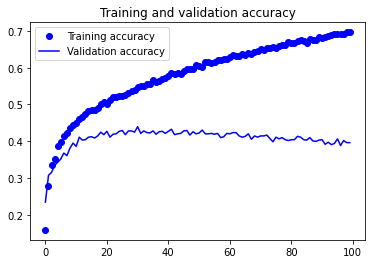

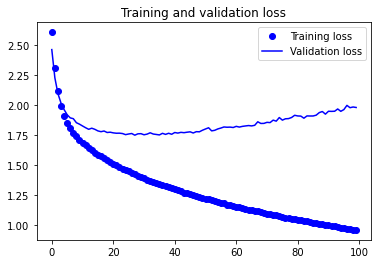

In [43]:
accuracy = trans_learn_train2.history['accuracy']
val_accuracy = trans_learn_train2.history['val_accuracy']
loss = trans_learn_train2.history['loss']
val_loss = trans_learn_train2.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Results

In [ ]:
#Saving models to avoid training after each restart

cnn_model1.save("model1.h5")
cnn_model2.save("model2.h5")
cnn_model3.save("model3.h5")
cnn_model4.save("model4.h5")
cnn_model5.save("model5.h5")
cnn_model6.save("model6.h5")
cnn_dropout_model1.save("dropoutmodel1.h5")
cnn_dropout_model2.save("dropoutmodel2.h5")
cnn_dropout_model3.save("dropoutmodel3.h5")
cnn_dropout_model4.save("dropoutmodel4.h5")
tr_model1.save("transferlearningmodel1.h5")
trans_learn_model2.save("transferlearningmodel2.h5")

In [50]:
from keras.models import load_model

names = ["model1", "model2", "model3", "model4", "model5", "model6", "dropout_model1", "dropout_model2", "dropout_model3", "dropout_model4", "trans_learn_model1", "trans_learn_model2"]
losses = list()
accuracies = list()

def list_filler(model):
    results = model.evaluate(valid_X, valid_Y)
    losses.append(results[0])
    accuracies.append(results[1])

list_filler(load_model("model1.h5"))
list_filler(load_model("model2.h5"))
list_filler(load_model("model3.h5"))
list_filler(load_model("model4.h5"))
list_filler(load_model("model5.h5"))
list_filler(load_model("model6.h5"))
list_filler(load_model("dropoutmodel1.h5"))
list_filler(load_model("dropoutmodel2.h5"))
list_filler(load_model("dropoutmodel3.h5"))
list_filler(load_model("dropoutmodel4.h5"))
list_filler(load_model("transferlearningmodel1.h5"))
list_filler(load_model("transferlearningmodel2.h5"))


28/28 [==============================] - 2s 69ms/step - loss: 1.9792 - accuracy: 0.3964


In [51]:
for i in range(len(names)):
    if(len(names[i]) == 6):
        print("model name :", names[i], "  \t\t\tloss :", losses[i], "\taccuracy :", accuracies[i])
    elif(len(names[i]) == 14):
        print("model name :", names[i], "  \t\tloss :", losses[i], "\taccuracy :", accuracies[i])
    else:    
        print("model name :", names[i], "\tloss :", losses[i], "\taccuracy :", accuracies[i])
    print("--------------------------------------------------------------------------------------------------------")

model name : model1   			loss : 2.2490315437316895 	accuracy : 0.32915717363357544
--------------------------------------------------------------------------------------------------------
model name : model2   			loss : 7.18349027633667 	accuracy : 0.29498860239982605
--------------------------------------------------------------------------------------------------------
model name : model3   			loss : 2.0988028049468994 	accuracy : 0.32687926292419434
--------------------------------------------------------------------------------------------------------
model name : model4   			loss : 2.280836582183838 	accuracy : 0.3451025187969208
--------------------------------------------------------------------------------------------------------
model name : model5   			loss : 2.2295284271240234 	accuracy : 0.2380409985780716
--------------------------------------------------------------------------------------------------------
model name : model6   			loss : 2.1533405780792236 	accuracy : 0.

#### So I used trans_learn_model1 to classify test dataset

In [52]:
final_model = load_model("transferlearningmodel1.h5")

In [53]:
final_model.evaluate(test_X, test_Y)

25/25 [==============================] - 2s 67ms/step - loss: 2.0092 - accuracy: 0.4406


[2.0091774463653564, 0.4405684769153595]

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
Y_pred = final_model.predict(test_X)
y_pred = np.argmax(Y_pred, axis=1)

In [56]:
test_Y = np.argmax(test_Y, axis = 1)

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_Y, y_pred)
print('Confusion Matrix:\n')
print(cm)

Confusion Matrix:

[[22  4  0  1  3  0  1  0  3  1  1  0  2  1  9]
 [ 1 12  5  0  3  2  1  0  2  1  6  3  1  8  2]
 [ 0  5 16  1  2 12  0  5  1  1  2  4  2  8  2]
 [ 3  0  1 36  0  1  5  0  4  6  0  2  1  1  1]
 [ 2  4  5  0  7  0  0  0  0  0 12  6  0  8  2]
 [ 0  1  7  1  0 26  1  0  1  0  1  7  2  6  0]
 [ 0  0  0  3  0  1 47  1  3  0  2  0  1  0  1]
 [ 5  2  0  1  2  3  5 25  0  1  1  5  3  4  1]
 [ 1  2  0  7  1  0  2  1 23  7  7  1  1  1  2]
 [ 0  3  0  8  0  1  0  0  4 19  0  2  0  3  3]
 [ 0  3  1  1  2  0  2  1  2  0 33  0  1  1  3]
 [ 2  3  2  5  2  3  3  0  3  3  3 10  0  1  1]
 [11  1  0  0  2  0  3  4  0  0  0  1 21  2  1]
 [ 0  6  5  0  2  4  0  2  1  0  2  3  1 24  4]
 [ 4  2  3  1  8  1  0  1  2  0  1  3  3  2 20]]
